In [119]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']
#data2 = data[data['user'] == 'Aluminiumminimumimmunity']
#data2 = data[data['user'] == 'fyodor_m_d1821']



#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
#data2 = data[data['user'] == 'nate_001_']
#data2 = data[data['user'] == 'enseje']
#data2 = data[data['user'] == 'kunmilan99']
#data2 = data[data['user'] == 'GoodStuffBuds']
#data2 = data[data['user'] == 'peroni_nasturo_azuro']
#data2 = data[data['user'] == 'icep1cke']
#data2 = data[data['user'] == 'bigladmush22']










# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
78,211,47,3109.0,24874.0
154,212,5,172.0,20483.0
156,213,3,29.0,19098.0
150,214,6,316.0,18270.0
41,215,85,15472.0,20487.0
11,216,263,26826.0,29647.0
110,217,28,1486.0,16306.0
111,220,28,895.0,20869.0
139,221,11,545.0,9867.0
88,222,42,4304.0,17426.0


In [120]:
data2['user'].max()

'Typhu25'

In [121]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
218,218,0.0,0.0,0.0
219,219,0.0,0.0,0.0
220,220,28.0,895.0,20869.0
221,221,11.0,545.0,9867.0
222,222,42.0,4304.0,17426.0


In [122]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,223.000000,223.000000,223.000000,223.000000
mean,111.000000,60.802691,6585.623318,14506.748879
std,64.518731,102.432824,9291.083284,11574.324234
min,0.000000,0.000000,0.000000,0.000000
25%,55.500000,0.000000,0.000000,0.000000
50%,111.000000,28.000000,3202.000000,17445.000000
75%,166.500000,61.500000,11355.500000,20864.500000
max,222.000000,654.000000,84465.000000,86789.000000


In [123]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0


In [124]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,3,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,5,21.0,529.0,20382.0,0.146944,5.661667,2.595427
6,6,37.0,11180.0,16563.0,3.105556,4.600833,67.499849
7,7,59.0,14613.0,17773.0,4.059167,4.936944,82.220222
8,8,50.0,6163.0,18686.0,1.711944,5.190556,32.981912
9,9,146.0,12736.0,16418.0,3.537778,4.560556,77.573395


In [125]:
stream_stats['persenteg'].describe()

count    223.000000
mean      32.139127
std       35.412176
min        0.000000
25%        0.000000
50%       17.551936
75%       66.308963
max       99.256062
Name: persenteg, dtype: float64

In [126]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.0,0.0,0.0
176,176,0.0,0.0,0.0,0.0,0.0,0.0
183,183,0.0,0.0,0.0,0.0,0.0,0.0
56,56,0.0,0.0,0.0,0.0,0.0,0.0
147,147,0.0,0.0,0.0,0.0,0.0,0.0
144,144,0.0,0.0,0.0,0.0,0.0,0.0
143,143,0.0,0.0,0.0,0.0,0.0,0.0
52,52,0.0,0.0,0.0,0.0,0.0,0.0
67,67,0.0,0.0,0.0,0.0,0.0,0.0
51,51,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
stream_stats['watch_length_in_hour'].sum() /24

16.997615740740738

In [128]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.0,0.0,0.0
176,176,0.0,0.0,0.0,0.0,0.0,0.0
183,183,0.0,0.0,0.0,0.0,0.0,0.0
56,56,0.0,0.0,0.0,0.0,0.0,0.0
147,147,0.0,0.0,0.0,0.0,0.0,0.0
144,144,0.0,0.0,0.0,0.0,0.0,0.0
143,143,0.0,0.0,0.0,0.0,0.0,0.0
52,52,0.0,0.0,0.0,0.0,0.0,0.0
67,67,0.0,0.0,0.0,0.0,0.0,0.0
51,51,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
96,96,44.0,16564.0,17130.0,4.601111,4.758333,96.695855
78,78,97.0,19479.0,20128.0,5.410833,5.591111,96.775636
15,15,18.0,20534.0,21117.0,5.703889,5.865833,97.239191
112,112,241.0,84465.0,86710.0,23.462500,24.086111,97.410910
20,20,226.0,20862.0,21336.0,5.795000,5.926667,97.778403
71,71,397.0,26331.0,26839.0,7.314167,7.455278,98.107232
116,116,654.0,12447.0,12687.0,3.457500,3.524167,98.108300
73,73,267.0,19558.0,19854.0,5.432778,5.515000,98.509117
62,62,303.0,11599.0,11766.0,3.221944,3.268333,98.580656
122,122,142.0,21614.0,21776.0,6.003889,6.048889,99.256062


In [130]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
213,213,3.0,29.0,19098.0,0.008056,5.305000,0.151848
214,214,6.0,316.0,18270.0,0.087778,5.075000,1.729611
215,215,85.0,15472.0,20487.0,4.297778,5.690833,75.521062
216,216,263.0,26826.0,29647.0,7.451667,8.235278,90.484703
217,217,28.0,1486.0,16306.0,0.412778,4.529444,9.113210
218,218,0.0,0.0,0.0,0.000000,0.000000,0.000000
219,219,0.0,0.0,0.0,0.000000,0.000000,0.000000
220,220,28.0,895.0,20869.0,0.248611,5.796944,4.288658
221,221,11.0,545.0,9867.0,0.151389,2.740833,5.523462
222,222,42.0,4304.0,17426.0,1.195556,4.840556,24.698726


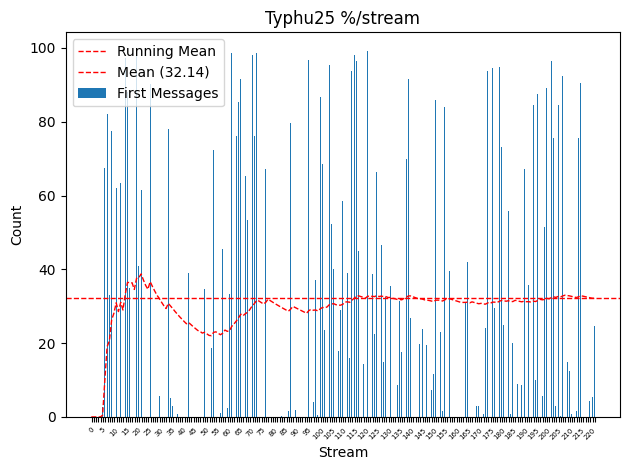

In [131]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()